In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
def return_full_spec(data_fn, wl_fn):
    hyperbb_data = pd.read_csv(data_fn)
    wl = np.genfromtxt(wl_fn, delimiter=',')
    
    del hyperbb_data['dt']
    del hyperbb_data['ScanIdx']
    del hyperbb_data['WaterTemp']
    del hyperbb_data['Depth']
    
    hyperbb_data.columns=wl.astype(str)
    
    return(hyperbb_data.to_numpy(), wl)

In [121]:
def return_med_spec(data_fn, wl_fn):
    hyperbb_data = pd.read_csv(data_fn)
    wl = np.genfromtxt(wl_fn, delimiter=',')
    
    del hyperbb_data['dt']
    del hyperbb_data['ScanIdx']
    del hyperbb_data['WaterTemp']
    del hyperbb_data['Depth']
    
    hyperbb_data.columns=wl.astype(str)
        
    med_bbspec = np.nanmedian(hyperbb_data.to_numpy(),axis=0)
    std_bbspec = np.nanstd(hyperbb_data.to_numpy(),axis=0)
    
    return(med_bbspec, std_bbspec, wl)

In [122]:
air_zero_med_bbspec, air_zero_std_bbspec, air_zero_wl = return_med_spec('data/hyper_bb_zero_air_processed_210722.csv', 'data/hyper_bb_zero_air_lambda_processed_210722.csv')
water_zero_med_bbspec, water_zero_std_bbspec, water_zero_wl = return_med_spec('data/hyper_bb_zero_water_processed_210722.csv', 'data/hyper_bb_lambda_zero_water_processed_210722.csv')

sample_med_bbspec, sample_std_bbspec, sample_wl = return_med_spec('data/hyper_bb_sample_processed_210722.csv', 'data/hyper_bb_lambda_sample_processed_210722.csv')

In [123]:
sample_full_bbspec, sample_wl = return_full_spec('data/hyper_bb_sample_processed_210722.csv', 'data/hyper_bb_lambda_sample_processed_210722.csv')

(-0.1, 0.1)

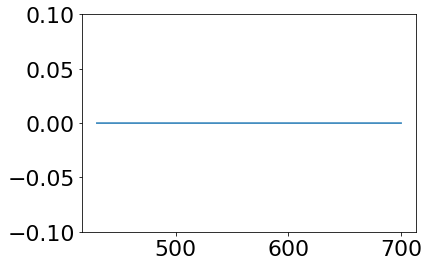

In [124]:
plt.plot(sample_wl, air_zero_med_bbspec)
plt.ylim(-0.1,0.1)

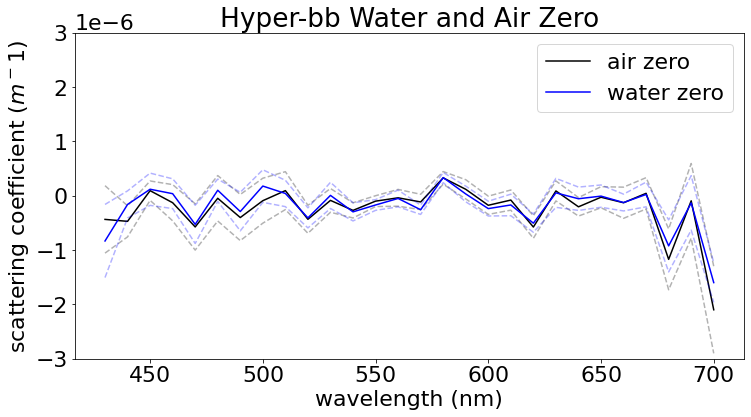

In [158]:
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(sample_wl, air_zero_med_bbspec, c='black', label='air zero')
ax.plot(sample_wl, air_zero_med_bbspec+air_zero_std_bbspec, c='black', linestyle='--', alpha=0.3)
ax.plot(sample_wl, air_zero_med_bbspec-air_zero_std_bbspec, c='black', linestyle='--', alpha=0.3)

ax.plot(sample_wl, water_zero_med_bbspec, c='blue', label='water zero')
ax.plot(sample_wl, water_zero_med_bbspec+water_zero_std_bbspec, c='blue', linestyle='--', alpha=0.3)
ax.plot(sample_wl, water_zero_med_bbspec-water_zero_std_bbspec, c='blue', linestyle='--', alpha=0.3)

ax.set_ylim(-0.000003, 0.000003)
ax.set_ylabel('scattering coefficient ($m^-1$)')
ax.set_xlabel('wavelength (nm)')
ax.legend()

ax.set_title('Hyper-bb Water and Air Zero')

fig.savefig('hyperbb_water_air_zero.png')

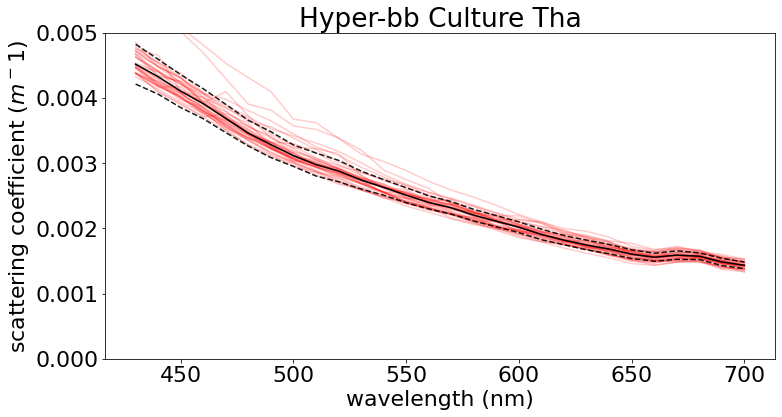

In [156]:
fig, ax = plt.subplots(figsize=(12,6))

sample_med_corrected = sample_med_bbspec - water_zero_med_bbspec


for i in range(35):
    ax.plot(sample_wl, sample_full_bbspec[i], c='red', alpha=0.2)

ax.plot(sample_wl, sample_med_corrected, c='black')
ax.plot(sample_wl, sample_med_corrected+sample_std_bbspec, c='black', linestyle='--', alpha=0.9)
ax.plot(sample_wl, sample_med_corrected-sample_std_bbspec, c='black', linestyle='--', alpha=0.9)

ax.set_title('Hyper-bb Culture Tha')
ax.set_ylim(0,0.005)

ax.set_ylabel('scattering coefficient ($m^-1$)')
ax.set_xlabel('wavelength (nm)')

# ax.plot(air_zero_med_bbspec)
# ax.plot(air_zero_med_bbspec+air_zero_std_bbspec)
# ax.plot(air_zero_med_bbspec-air_zero_std_bbspec)
#plt.ylim(-0.1,0.1)

fig.savefig('hyperbb_culture_tha.png')

Text(0.5, 0, 'wavelength (nm)')

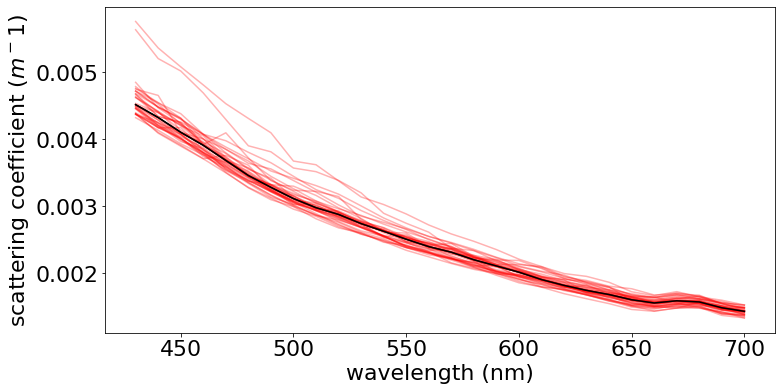

In [150]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(sample_wl, np.nanmedian(sample_full_bbspec,axis=0), c='black')

for i in range(35):
    ax.plot(sample_wl, sample_full_bbspec[i], c='red', alpha=0.3)
    
ax.plot(sample_wl, np.nanmedian(sample_full_bbspec,axis=0), c='black')

#ax.set_ylim(0,0.01)

ax.set_ylabel('scattering coefficient ($m^-1$)')
ax.set_xlabel('wavelength (nm)')

# ax.plot(air_zero_med_bbspec)
# ax.plot(air_zero_med_bbspec+air_zero_std_bbspec)
# ax.plot(air_zero_med_bbspec-air_zero_std_bbspec)
#plt.ylim(-0.1,0.1)